### Urban Sound 8K Classification using RNN

This notebook implements audio classification using a Recurrent Neural Network (RNN), the intention being to exploit sequence patterns that occur in the feature inputs. This has been updated to use Python 3.

In [1]:
import glob
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from multiprocessing import Pool
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size // 2)

def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 20, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    labels = []
    for sub_dir in sub_dirs:
        for i, fn in enumerate(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
            print(str(i) + ' ', end='')
            sound_clip,s = librosa.load(fn)
            label = fn.split('fold')[1].split('-')[1]
            for start, end in windows(sound_clip,window_size):
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
                    mfccs.append(mfcc)
                    labels.append(label)         
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features), np.array(labels,dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

### Saving Extracted Features (optional)

The code in the cell below can be run (once) to convert the raw audio files into features, which are stored as numpy arrays. As this process is quite time consuming, we'd prefer to just do it once, and then load the numpy data when we want to do some training.


In [4]:
# use this to process the audio files into numpy arrays
def save_folds(save_dir, num_folds=10):
    pool = Pool(3)
    pool.map(save_fold, range(2, num_folds))
    
def save_fold(k):
    fold_name = 'fold' + str(k+1)
    print("\nSaving " + fold_name)
    
    features, labels = extract_features(data_dir, [fold_name])
    labels = one_hot_encode(labels)

    print("Features of", fold_name , " = ", features.shape)
    print("Labels of", fold_name , " = ", labels.shape)

    feature_file = os.path.join(save_dir, fold_name + '_x.npy')
    labels_file = os.path.join(save_dir, fold_name + '_y.npy')
    np.save(feature_file, features)
    print("Saved " + feature_file)
    np.save(labels_file, labels)
    print("Saved " + labels_file)

def assure_path_exists(path):
    mydir = os.path.join(os.getcwd(), path)
    if not os.path.exists(mydir):
        os.makedirs(mydir)

# uncomment this to recreate and save the feature vectors
data_dir = "../UrbanSound8K/audio" # Where you have saved the UrbanSound8K data set"       
save_dir = "data/us8k-np-rnn"
assure_path_exists(save_dir)
save_folds(save_dir)



Saving fold3
Saving fold4

Saving fold5

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 

Labels of fold4  =  (6048, 10)
Saved data/us8k-np-rnn/fold4_x.npy
Saved data/us8k-np-rnn/fold4_y.npy

Saving fold8
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248

Labels of fold8  =  (4942, 10)
Saved data/us8k-np-rnn/fold8_x.npy
Saved data/us8k-np-rnn/fold8_y.npy
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 2

### Reload

In [5]:
# this is used to load the folds incrementally
data_dir = 'data/us8k-np-rnn'

def load_folds(folds):
    subsequent_fold = False
    for k in range(len(folds)):
        fold_name = 'fold' + str(folds[k])
        feature_file = os.path.join(data_dir, fold_name + '_x.npy')
        labels_file = os.path.join(data_dir, fold_name + '_y.npy')
        loaded_features = np.load(feature_file)
        loaded_labels = np.load(labels_file)
        print (fold_name, "features: ", loaded_features.shape)

        if subsequent_fold:
            features = np.concatenate((features, loaded_features))
            labels = np.concatenate((labels, loaded_labels))
        else:
            features = loaded_features
            labels = loaded_labels
            subsequent_fold = True
        
    return features, labels

This code below extracts the features from a single file - in this case, 88200 data points have been reduced to 5740. This is not as compact as the inputs fed into the Feed-Forward Network, which had only 193 features, but more compact than the 34440 features input into the CNN.

In [6]:
data_dir = "data/us8k-np-rnn"

def extract_feature_array(filename, bands = 20, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    sound_clip,s = librosa.load(filename)
    for (start,end) in windows(sound_clip,window_size):
        if(len(sound_clip[start:end]) == window_size):
            signal = sound_clip[start:end]
            mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
            mfccs.append(mfcc)
            
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features)

sample_filename = "samples/us8k/music.wav"
features = extract_feature_array(sample_filename)
data_points, _ = librosa.load(sample_filename)
print ("IN: Initial Data Points =", len(data_points))
print ("OUT: Total features =", np.shape(features))

IN: Initial Data Points = 88200
OUT: Total features = (7, 20, 41)


### Training a Recurrent Neural Network with Keras and TensorFlow

First, a method to define some metrics that will be used to evaluate the performance of a trained model.

In [14]:
tf.set_random_seed(0)
np.random.seed(0)

def evaluate(model):
    y_prob = model.predict_proba(test_x, verbose=0)
    y_pred = model.predict_classes(test_x)
    y_true = np.argmax(test_y, 1)

    roc = roc_auc_score(test_y, y_prob)
    print ("ROC:",  round(roc,3))

    # evaluate the model
    score, accuracy = model.evaluate(test_x, test_y, batch_size=32)
    print("\nAccuracy = {:.2f}".format(accuracy))

    # the F-score gives a similiar value to the accuracy score, but useful for cross-checking
    p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
    print ("F-Score:", round(f,2))
    
    return roc, accuracy

The following section defines the successive layers of our recurrent neural network (RNN). RNNs are effectively a series of feed-forward networks that are connected to each other. The output of each network, and its hidden layer is fed into the next one. 

LSTMs by default return the last vector, rather than the entire sequence, so the `return_sequences=True` flag is used to facilitate stacking, which allows for a more complex feature representation of the input, and thus a greater ability to generalise. A small dropout value is 

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

data_dim = 41
timesteps = 20
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()

# returns a sequence of vectors of dimension 256
model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, data_dim)))  

model.add(Dropout(0.2))

# return a single vector of dimension 128
model.add(LSTM(128))  

model.add(Dropout(0.2))

# apply softmax to output
model.add(Dense(num_classes, activation='softmax'))


# compile the model for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# load fold1 for testing
train_x, train_y = load_folds([1,2,3,4,5,6])

# load fold2 for validation
valid_x, valid_y = load_folds([9])
    
# load fold3 for testing
test_x, test_y = load_folds([10])

# a stopping function to stop training before we excessively overfit to the training set
earlystop = EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='auto')

model.fit(train_x, train_y, batch_size=128, nb_epoch=10, callbacks=[earlystop], validation_data=(valid_x, valid_y))


Using TensorFlow backend.


fold1 features:  (5446, 20, 41)
fold2 features:  (5388, 20, 41)
fold3 features:  (5852, 20, 41)
fold4 features:  (6048, 20, 41)
fold5 features:  (5689, 20, 41)
fold6 features:  (5080, 20, 41)
fold9 features:  (5118, 20, 41)
fold10 features:  (5218, 20, 41)


/Users/leonmak/.virtualenvs/keras_tf3/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33503 samples, validate on 5118 samples
Epoch 1/10
33503/33503 [==============================] - 159s - loss: 0.9665 - acc: 0.6727 - val_loss: 1.9433 - val_acc: 0.5182
Epoch 2/10
33503/33503 [==============================] - 206s - loss: 0.6480 - acc: 0.7771 - val_loss: 2.0101 - val_acc: 0.5018
Epoch 00001: early stopping


In [15]:
# now evaluate the trained model against the unseen test data
print("Evaluating model...")
roc, acc = evaluate(model)

Evaluating model...
5216/5218 [============================>.] - ETA: 0s
Accuracy = 0.47
F-Score: 0.47


### Confusion Matrix


Showing Confusion Matrix
5218/5218 [==============================] - 9s     


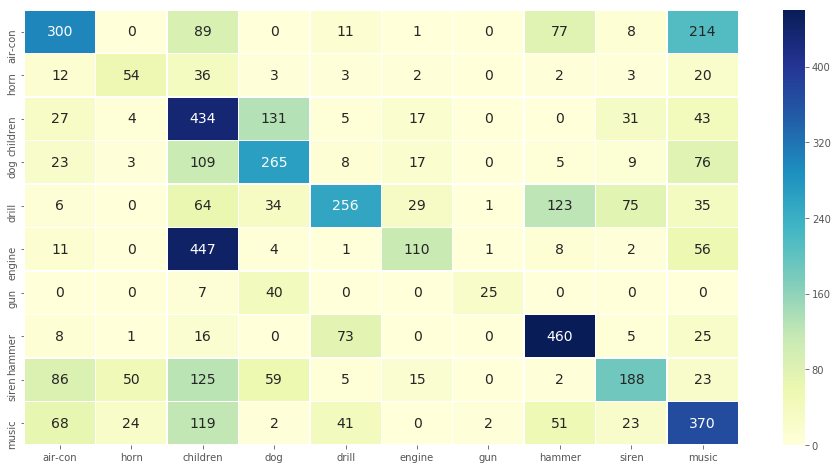

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

labels = ["air-con","horn","children","dog","drill","engine","gun","hammer","siren","music"]
print ("Showing Confusion Matrix")
y_prob = model.predict_proba(test_x, verbose=0)
y_pred = model.predict_classes(test_x)
y_true = np.argmax(test_y, 1)
cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize = (16,8))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g', linewidths=.5, cmap="YlGnBu")

In [29]:
sound_file_paths = ["aircon.wav", "carhorn.wav", "play.wav", "dogbark.wav", "drill.wav",
                    "engine.wav","gunshots.wav","jackhammer.wav","siren.wav","music.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]
parent_dir = 'samples/us8k/'


# create predictions for each of the sound classes
for s in range(len(sound_names)):

    print ("\n----- ", sound_names[s], "-----")
    # load audio file and extract features
    predict_file = parent_dir + sound_file_paths[s]
    predict_x = extract_feature_array(predict_file)
    
    # generate prediction, passing in just a single row of features
    predictions = model.predict(predict_x)
    
    if len(predictions) == 0: 
        print ("No prediction")
        continue
    
    #for i in range(len(predictions[0])):
    #    print sound_names[i], "=", round(predictions[0,i] * 100, 1)
    
    # get the indices of the top 2 predictions, invert into descending order
    ind = np.argpartition(predictions[0], -2)[-2:]
    ind[np.argsort(predictions[0][ind])]
    ind = ind[::-1]
    
    print ("Top guess: ", sound_names[ind[0]], " (",round(predictions[0,ind[0]],3),")")
    print ("2nd guess: ", sound_names[ind[1]], " (",round(predictions[0,ind[1]],3),")")

    


-----  air conditioner -----
Top guess:  air conditioner  ( 0.955 )
2nd guess:  siren  ( 0.015 )

-----  car horn -----
Top guess:  car horn  ( 0.982 )
2nd guess:  street music  ( 0.012 )

-----  children playing -----
Top guess:  children playing  ( 0.512 )
2nd guess:  air conditioner  ( 0.233 )

-----  dog bark -----
Top guess:  dog bark  ( 0.79 )
2nd guess:  children playing  ( 0.168 )

-----  drilling -----
Top guess:  drilling  ( 0.978 )
2nd guess:  jackhammer  ( 0.012 )

-----  engine idling -----
Top guess:  engine idling  ( 0.984 )
2nd guess:  street music  ( 0.006 )

-----  gun shot -----
Top guess:  dog bark  ( 0.703 )
2nd guess:  gun shot  ( 0.215 )

-----  jackhammer -----
Top guess:  jackhammer  ( 0.72 )
2nd guess:  engine idling  ( 0.242 )

-----  siren -----
Top guess:  siren  ( 0.984 )
2nd guess:  dog bark  ( 0.014 )

-----  street music -----
Top guess:  street music  ( 0.642 )
2nd guess:  jackhammer  ( 0.165 )
